##### Análise Exploratória do dataset heart.csv, correlações, remoção de outliers, remoção de duplicates... 
##### Aplicação do algoritmo KNN(KNeighborsClassifier) e outros algoritmos para termos noção da precisão do KNN;
##### Aplicação do algoritmo KNN com StandardScaler para padronizar as features numéricas removendo a média e escala a variância a uma unidade e assim melhorando a aplicação do KNN;
##### O StandardScaler: Modelos Não Baseados em Árvores de Decisão se beneficiam mais deste tipo de padronização(StandardScaler).

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [62]:
ds = pd.read_csv('/home/jbrun0r/Documentos/scripts/datasets/heart.csv')
ds_copy = pd.read_csv('/home/jbrun0r/Documentos/scripts/datasets/heart.csv')

##### age: Idade do paciente
##### sex: Sexo do paciente
    0: F;
    1: M.
##### cp : tipo de dor no peito no peito
    1: angina típica;
    2: angina atípica;
    3: dor não anginosa;
    4: assintomático.
##### trtbps : pressão arterial em repouso (em mm Hg)
##### chol : colestoral em mg/dl obtido via sensor de IMC(Colesterol sérico em mg/dl.)
##### fbs : (glicemia em jejum > 120 mg/dl) (Açúcar no sangue em jejum > 120 mg/dl = 0 | < 120mg/dl = 1.)
    1 = verdadeiro;
    0 = falso.
##### rest_ecg : Resultados eletrocardiográficos em repouso
    0: normal;
    1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV);
    2: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes.
##### thalach : Frequência cardíaca máxima atingida
    0 = menos chance de ataque cardíaco
    1 = mais chance de ataque cardíaco
##### exng: Angina induzida pelo exercício
    1 = sim
    0 = não
##### Oldpeak: Depressão do segmento ST induzida pelo exercício em relação ao repouso
##### slp: Inclinação do segmento ST de pico do exercício.
##### caa: número de vasos principais
    0-3
##### thal: Talassemia: 
    1 = normal;
    2 = problema corrigido; 
    3 = problema reversível.
##### output:
    0 = não possui doença cardíaca;
    1 = possui doença cardíaca.
##### Angina é o nome dado para a dor no peito causada pela diminuição do fluxo de sangue no coração, o que é chamado de isquemia. Ela não é uma doença, mas está relacionada a outras condições que provocam obstrução nas artérias coronárias, responsáveis por levar sangue ao coração.

In [63]:
ds.isnull().sum()
#Abaixo podemos verificar se existem registros nulos em nossa base de dados, 
# e para a nossa sorte nenhum foi encontrado.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [64]:
ds.min()
# Podemos ver que também não possuímos valores negativos nos dados.

age          29.0
sex           0.0
cp            0.0
trtbps       94.0
chol        126.0
fbs           0.0
restecg       0.0
thalachh     71.0
exng          0.0
oldpeak       0.0
slp           0.0
caa           0.0
thall         0.0
output        0.0
dtype: float64

In [65]:
ds_copy.duplicated().sum()
# Podemos ver que há 'uma' linha duplicada e tiraremos para não causar overfit

1

In [66]:
#Removendo a duplicação
ds = ds.drop_duplicates()
ds_copy = ds_copy.drop_duplicates()

In [67]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


###### count: Total de registros existentes.
###### mean: valor da média.
###### std: desvio padrão.
###### min e max: valores mínimos e máximos.
###### 25%: ou primeiro quartil, que corresponde aos primeiros 25% dos valores de nossos registros.
###### 50%: ou mediana, que corresponde aos primeiros 50% dos valores de nossos registros, essa é a nossa medida central dos dados. Metade dos nossos valores são menores que a mediana e a outra metade é maior a este valor. A mediana é uma opção muito interessante quando comparado a média, pois ela não sofre com valores discrepantes.
###### 75%: ou terceiro quartil, que corresponde aos primeiros 75% dos valores de nossos registros.


In [68]:
ds.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

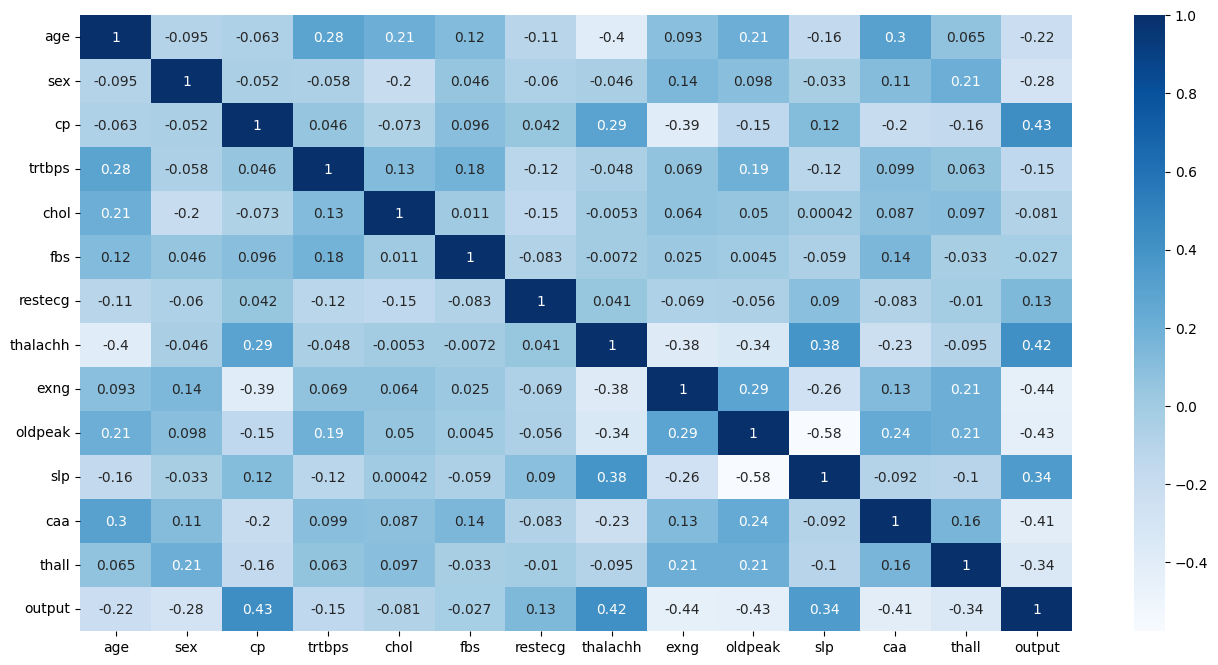

In [69]:
plt.figure(figsize=(16,8))
sns.heatmap(ds.corr(), annot = True, cmap='Blues')

In [70]:
categoricas = ['sex', 'cp', 'fbs','restecg','exng', 'slp','caa', 'thall']
numericas = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

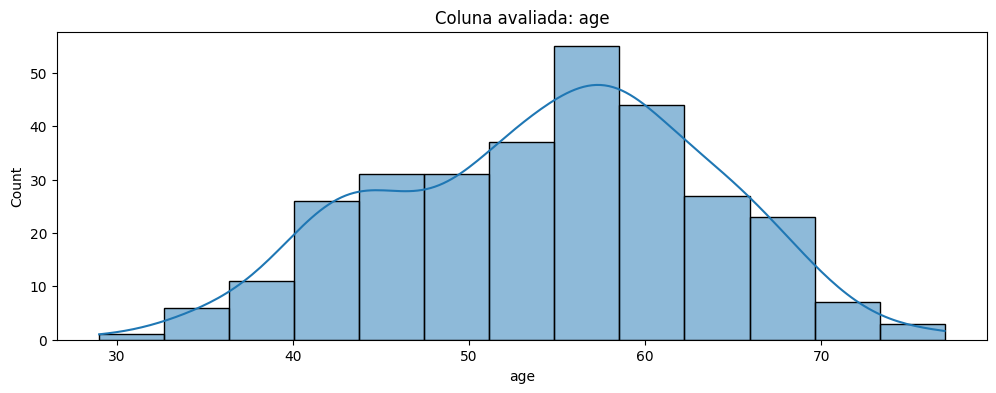

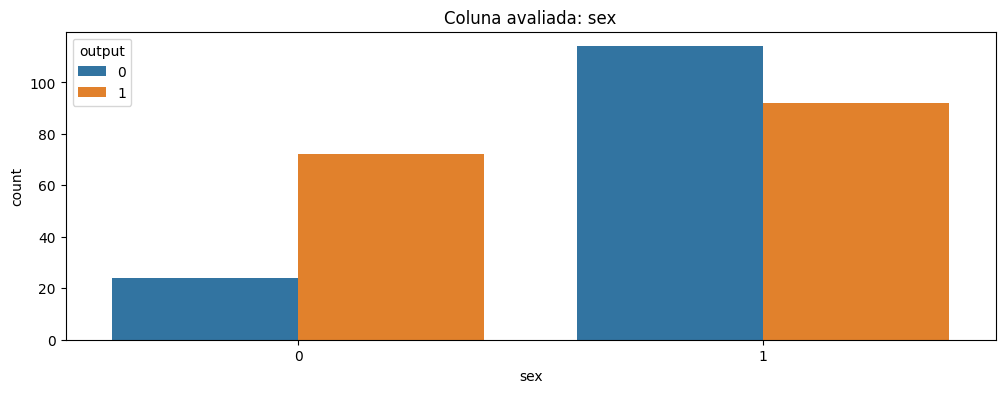

output 0: 
     sex 0 = 24 -> 17.39%
     sex 1 = 114 -> 82.61%

output 1: 
     sex 0 = 72 -> 43.9%
     sex 1 = 92 -> 56.1%

GERAL: 
     sex 0 e output 0 = 24 -> 7.947%
     sex 0 e output 1 = 72 -> 23.84%
     sex 1 e output 0 = 114 -> 37.75%
     sex 1 e output 1 = 92 -> 30.46%



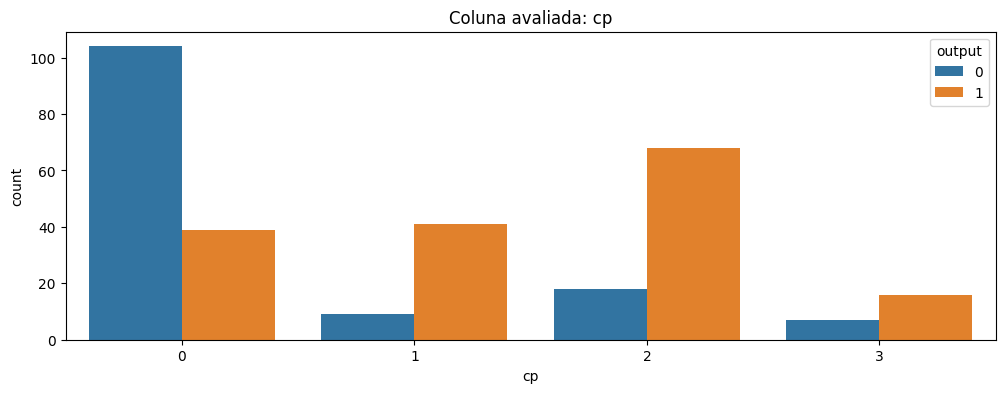

output 0: 
     cp 0 = 104 -> 75.36%
     cp 1 = 9 -> 6.522%
     cp 2 = 18 -> 13.04%
     cp 3 = 7 -> 5.072%

output 1: 
     cp 0 = 39 -> 23.78%
     cp 1 = 41 -> 25.0%
     cp 2 = 68 -> 41.46%
     cp 3 = 16 -> 9.756%

GERAL: 
     cp 0 e output 0 = 104 -> 34.44%
     cp 0 e output 1 = 39 -> 12.91%
     cp 1 e output 0 = 9 -> 2.98%
     cp 1 e output 1 = 41 -> 13.58%
     cp 2 e output 0 = 18 -> 5.96%
     cp 2 e output 1 = 68 -> 22.52%
     cp 3 e output 0 = 7 -> 2.318%
     cp 3 e output 1 = 16 -> 5.298%



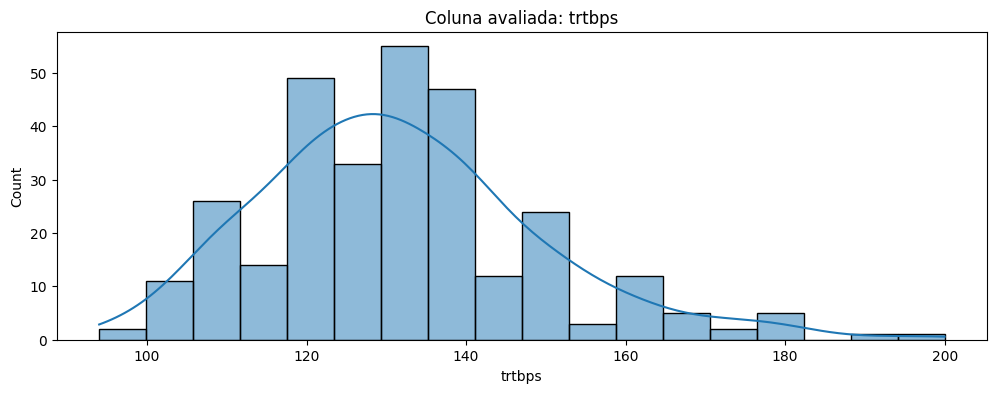

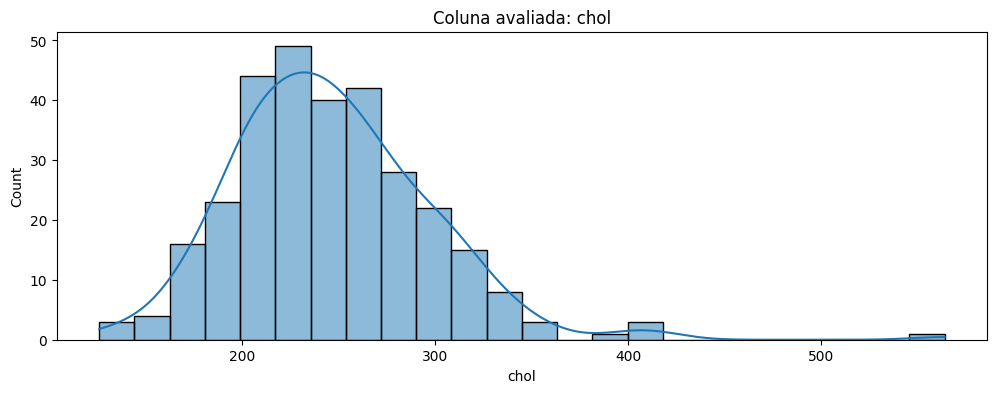

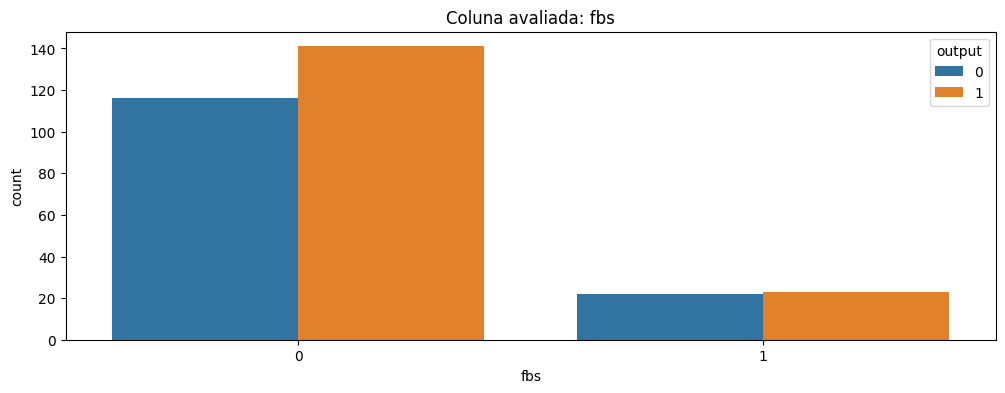

output 0: 
     fbs 0 = 116 -> 84.06%
     fbs 1 = 22 -> 15.94%

output 1: 
     fbs 0 = 141 -> 85.98%
     fbs 1 = 23 -> 14.02%

GERAL: 
     fbs 0 e output 0 = 116 -> 38.41%
     fbs 0 e output 1 = 141 -> 46.69%
     fbs 1 e output 0 = 22 -> 7.285%
     fbs 1 e output 1 = 23 -> 7.616%



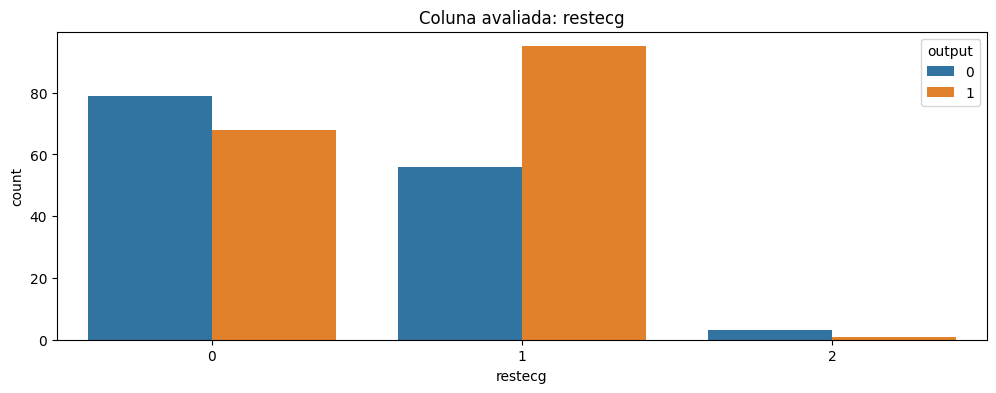

output 0: 
     restecg 0 = 79 -> 57.25%
     restecg 1 = 56 -> 40.58%
     restecg 2 = 3 -> 2.174%

output 1: 
     restecg 0 = 68 -> 41.46%
     restecg 1 = 95 -> 57.93%
     restecg 2 = 1 -> 0.6098%

GERAL: 
     restecg 0 e output 0 = 79 -> 26.16%
     restecg 0 e output 1 = 68 -> 22.52%
     restecg 1 e output 0 = 56 -> 18.54%
     restecg 1 e output 1 = 95 -> 31.46%
     restecg 2 e output 0 = 3 -> 0.9934%
     restecg 2 e output 1 = 1 -> 0.3311%



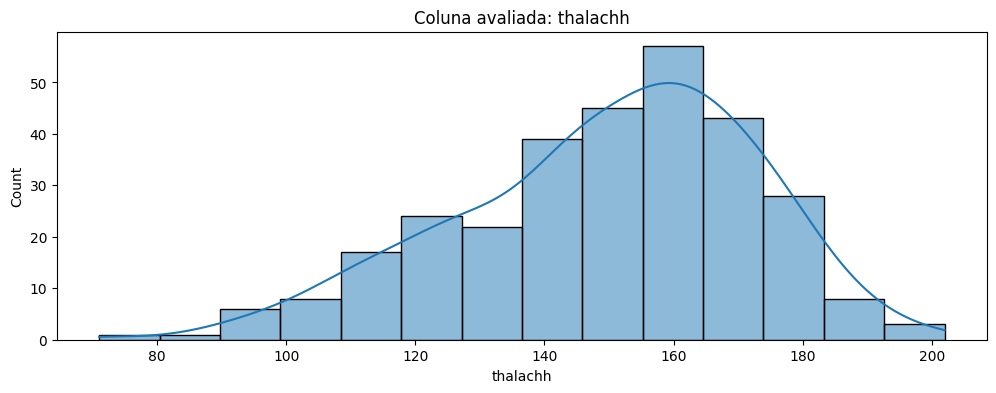

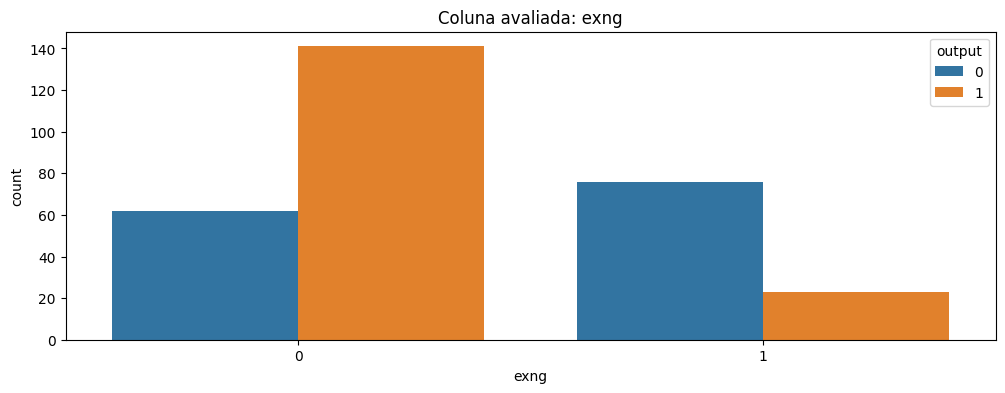

output 0: 
     exng 0 = 62 -> 44.93%
     exng 1 = 76 -> 55.07%

output 1: 
     exng 0 = 141 -> 85.98%
     exng 1 = 23 -> 14.02%

GERAL: 
     exng 0 e output 0 = 62 -> 20.53%
     exng 0 e output 1 = 141 -> 46.69%
     exng 1 e output 0 = 76 -> 25.17%
     exng 1 e output 1 = 23 -> 7.616%



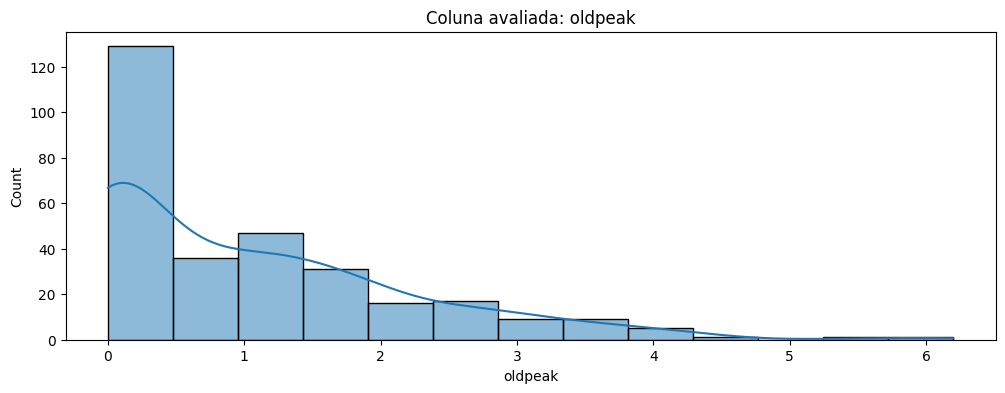

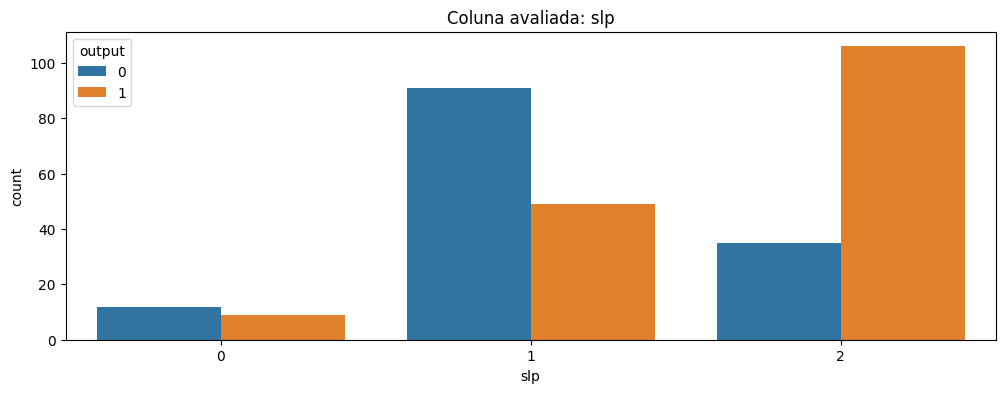

output 0: 
     slp 0 = 12 -> 8.696%
     slp 1 = 91 -> 65.94%
     slp 2 = 35 -> 25.36%

output 1: 
     slp 0 = 9 -> 5.488%
     slp 1 = 49 -> 29.88%
     slp 2 = 106 -> 64.63%

GERAL: 
     slp 0 e output 0 = 12 -> 3.974%
     slp 0 e output 1 = 9 -> 2.98%
     slp 1 e output 0 = 91 -> 30.13%
     slp 1 e output 1 = 49 -> 16.23%
     slp 2 e output 0 = 35 -> 11.59%
     slp 2 e output 1 = 106 -> 35.1%



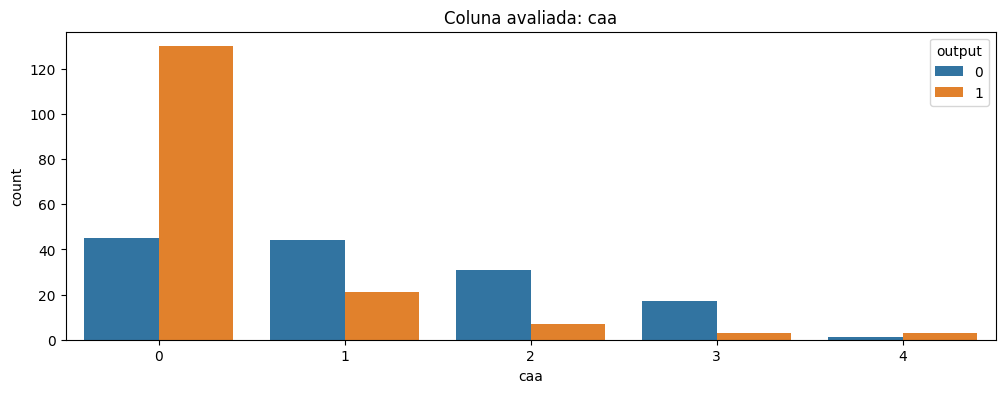

output 0: 
     caa 0 = 45 -> 32.61%
     caa 1 = 44 -> 31.88%
     caa 2 = 31 -> 22.46%
     caa 3 = 17 -> 12.32%
     caa 4 = 1 -> 0.7246%

output 1: 
     caa 0 = 130 -> 79.27%
     caa 1 = 21 -> 12.8%
     caa 2 = 7 -> 4.268%
     caa 3 = 3 -> 1.829%
     caa 4 = 3 -> 1.829%

GERAL: 
     caa 0 e output 0 = 45 -> 14.9%
     caa 0 e output 1 = 130 -> 43.05%
     caa 1 e output 0 = 44 -> 14.57%
     caa 1 e output 1 = 21 -> 6.954%
     caa 2 e output 0 = 31 -> 10.26%
     caa 2 e output 1 = 7 -> 2.318%
     caa 3 e output 0 = 17 -> 5.629%
     caa 3 e output 1 = 3 -> 0.9934%
     caa 4 e output 0 = 1 -> 0.3311%
     caa 4 e output 1 = 3 -> 0.9934%



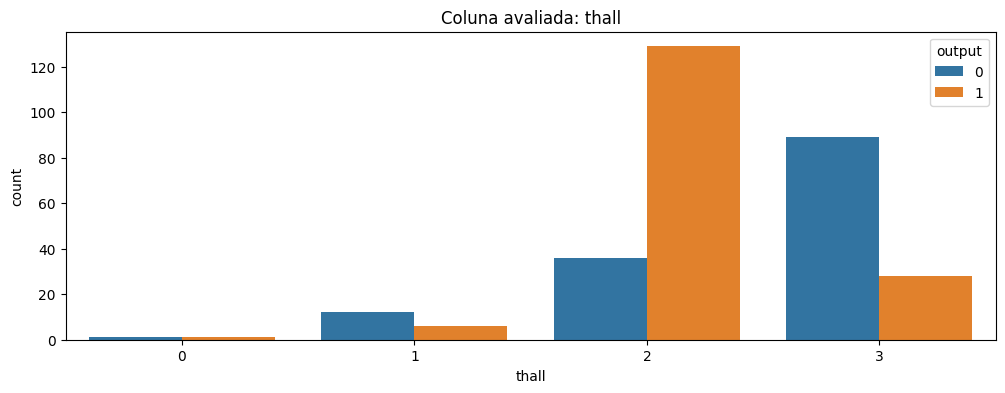

output 0: 
     thall 0 = 1 -> 0.7246%
     thall 1 = 12 -> 8.696%
     thall 2 = 36 -> 26.09%
     thall 3 = 89 -> 64.49%

output 1: 
     thall 0 = 1 -> 0.6098%
     thall 1 = 6 -> 3.659%
     thall 2 = 129 -> 78.66%
     thall 3 = 28 -> 17.07%

GERAL: 
     thall 0 e output 0 = 1 -> 0.3311%
     thall 0 e output 1 = 1 -> 0.3311%
     thall 1 e output 0 = 12 -> 3.974%
     thall 1 e output 1 = 6 -> 1.987%
     thall 2 e output 0 = 36 -> 11.92%
     thall 2 e output 1 = 129 -> 42.72%
     thall 3 e output 0 = 89 -> 29.47%
     thall 3 e output 1 = 28 -> 9.272%



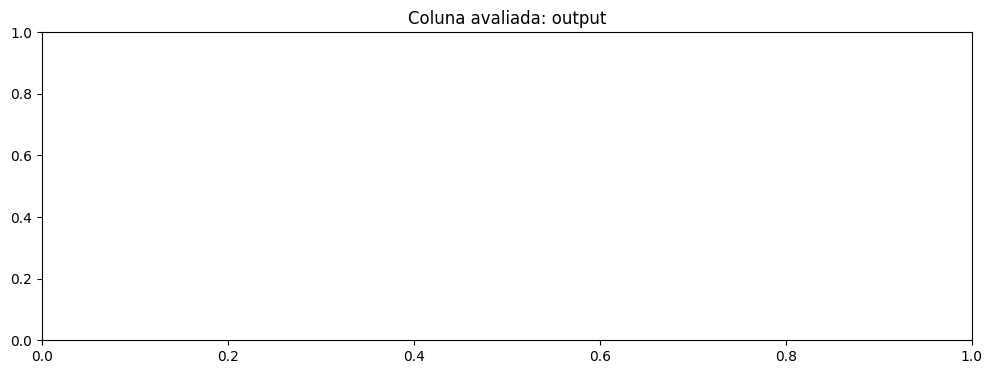

In [71]:
for c in ds_copy.columns:
    plt.figure(figsize=(12,4))
    plt.title(f'Coluna avaliada: {c}')
    if c in categoricas:
        sns.countplot(x = ds_copy[c], hue= ds.output)
        plt.show()

        n = ds_copy[c].loc[ds_copy.output == 0].value_counts()
        y = ds_copy[c].loc[ds_copy.output == 1].value_counts()

        print('output 0: ')
        for i in range(len(n)):
            print(f'     {c} '+str(i)+ ' = '+str(n[i])+' -> {:.4}'.format((n[i]/len(ds_copy[c].loc[ds_copy.output==0]))*100)+'%')
        print('')
        print('output 1: ')
        for i in range(len(y)):
            print(f'     {c} '+str(i)+' = '+str(y[i])+' -> {:.4}'.format((y[i]/len(ds_copy[c].loc[ds_copy.output==1]))*100)+'%')
        print('')
        print('GERAL: ')
        for i in range(len(n)):
            print(f'     {c} '+str(i)+' e output 0 = '+str(n[i])+' -> {:.4}'.format((n[i]/len(ds_copy[c]))*100)+'%')
            print(f'     {c} '+str(i)+' e output 1 = '+str(y[i])+' -> {:.4}'.format((y[i]/len(ds_copy[c]))*100)+'%')
        print('')

    if c in numericas:
        sns.histplot(ds_copy[c], kde=True)

## Análise:

##### caa: existem entradas incorrentas, segundo o link da kaggle para este dataset, caa deveria se comportar de 0 a 3, porém observamos que há um tipo de entrada incorreta, trataremos isto:

In [72]:
ds.caa.loc[ds.caa == 4] = 0

##### tha: existem entradas incorrentas, segundo o link da kaggle para este dataset, thall deveria se comportar de 1 a 3, porém observamos que há um tipo de entrada incorreta, trataremos isto:

In [73]:
ds.thall.loc[ds.thall == 0] = 2

##### Podemos observar outliers nas numericas com os histogramas, para evidenciar confira o boxplot:

<AxesSubplot:>

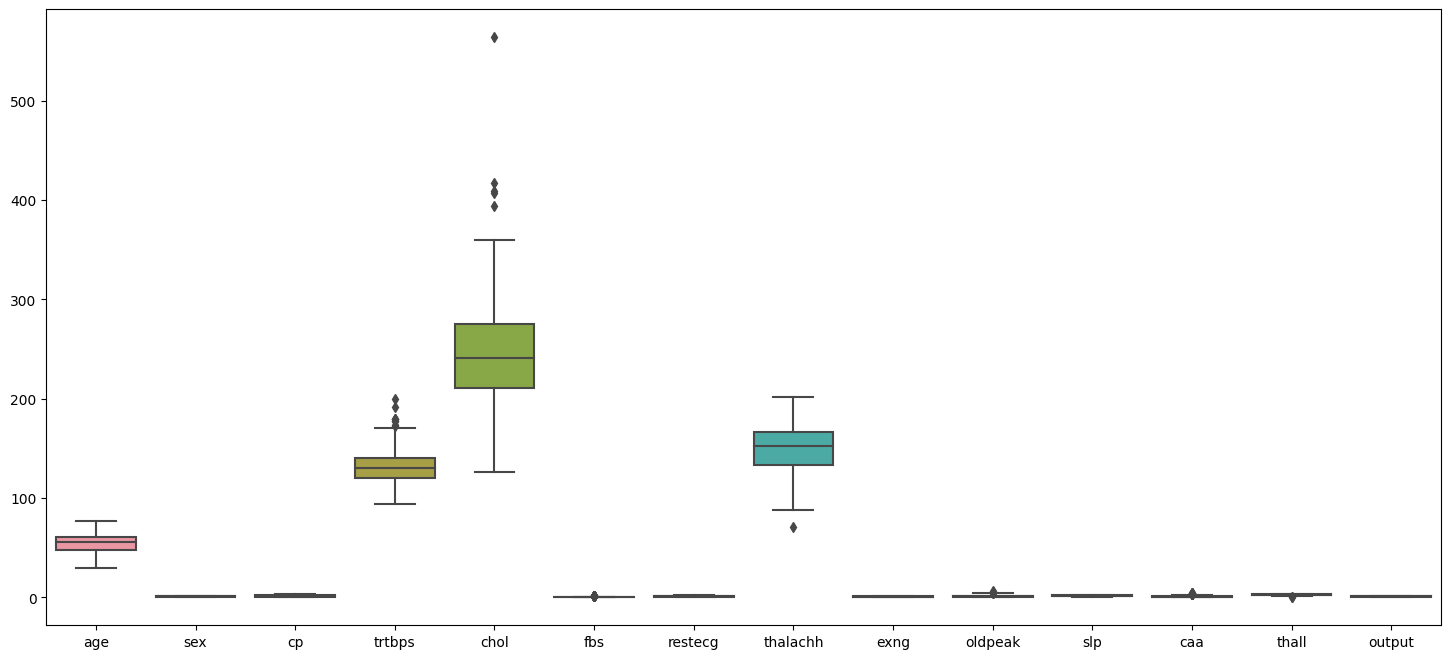

In [74]:
plt.figure(figsize=(18,8))
sns.boxplot(data = ds_copy)

### Tratamento dos outliers

##### trtbps: 

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


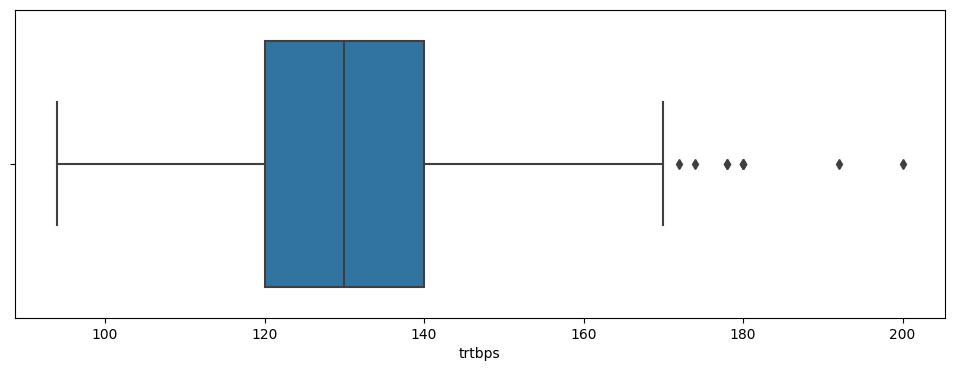

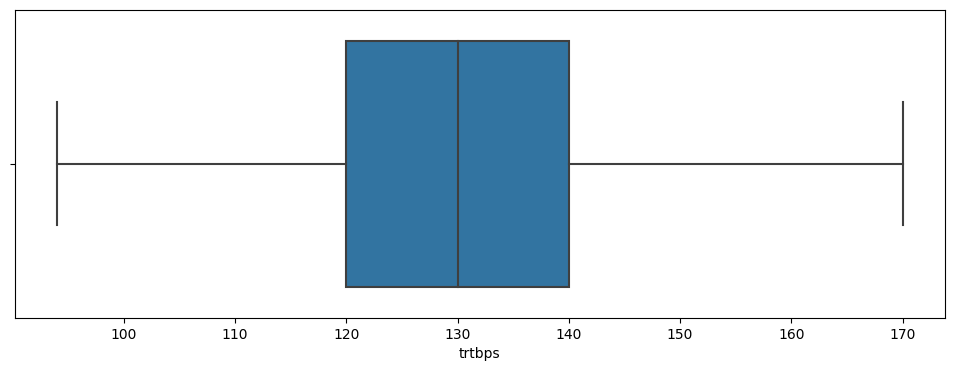

count    302.000000
mean     131.258278
std       16.605232
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trtbps, dtype: float64

In [75]:
plt.figure(figsize=(12,4))
sns.boxplot(ds_copy.trtbps)
plt.show

# Tratamento dos outliers
#ds.trtbps.quantile(0.97)
ds.trtbps.loc[ds.trtbps > 170] = 170

# Plotando novo boxplot após o tratamento de outliers
plt.figure(figsize=(12,4))
sns.boxplot(ds.trtbps)
plt.show()

ds.trtbps.describe().transpose()

##### chol: 

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


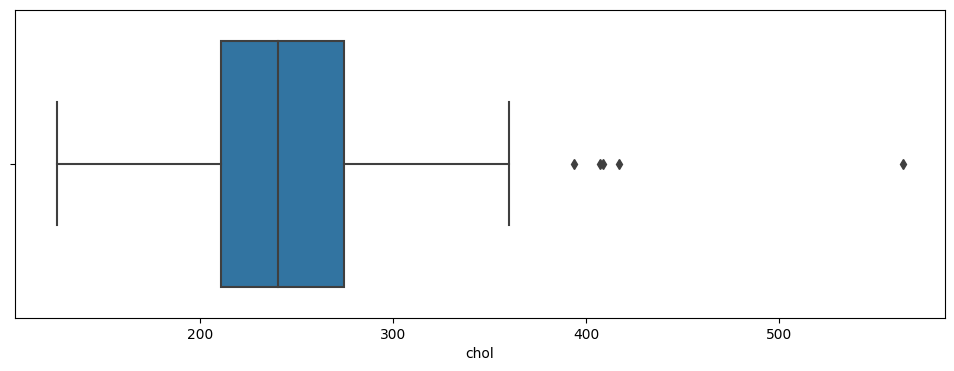

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


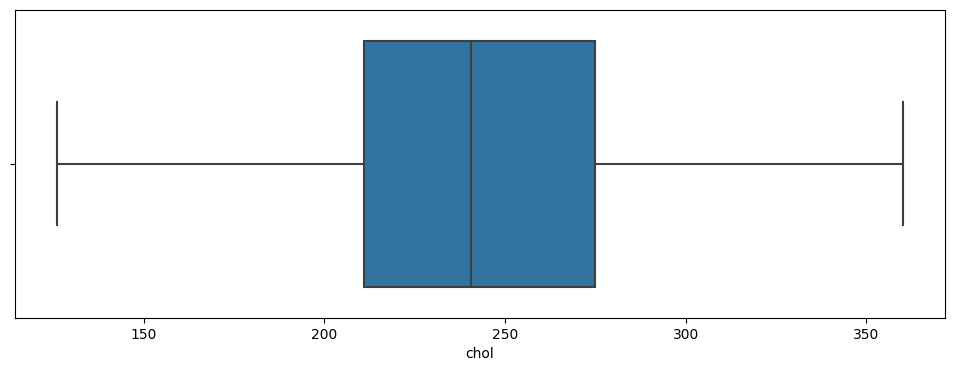

count    302.000000
mean     245.205298
std       47.049535
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      360.000000
Name: chol, dtype: float64

In [76]:
# Há presença de outliers
plt.figure(figsize=(12,4))
sns.boxplot(ds_copy.chol)
plt.show()

# Tratando os outliers
#ds_copy.chol.quantile(0.98338871)
ds.chol.loc[ds.chol > 360] = 360

# Plotagem com outliers tratados
plt.figure(figsize=(12,4))
sns.boxplot(ds.chol)
plt.show()

ds.chol.describe().transpose()

##### thalachh

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


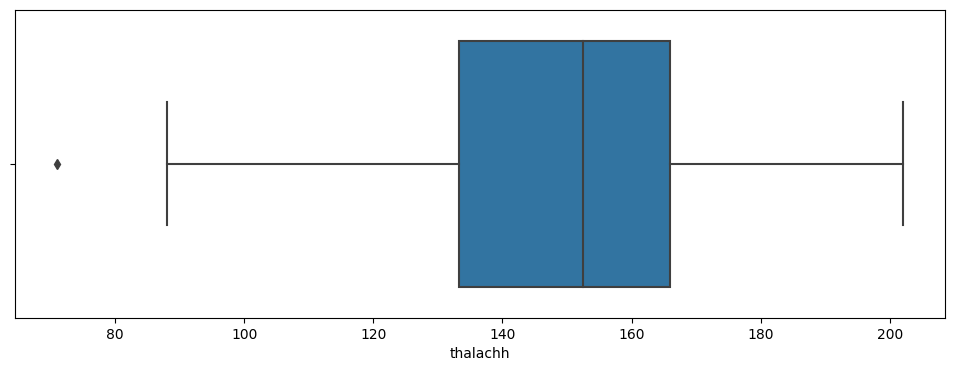

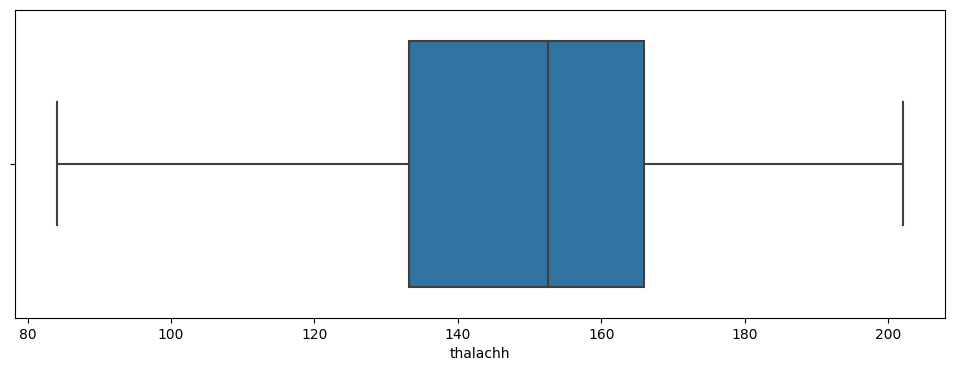

count    302.000000
mean     149.612997
std       22.765983
min       84.125000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [77]:
plt.figure(figsize=(12, 4))
sns.boxplot(ds_copy.thalachh)

# Tratamento do outlier
# Limite Inferior do boxplot = Primeiro Quartil (– 1,5 * (Terceiro Quartil – Primeiro Quartil))
limite_inferior = ( ds.thalachh.quantile(0.25)) -1.5 * (ds.thalachh.quantile(0.75)-ds.thalachh.quantile(0.25))
# o limite_inferior é igual a 84.75
# quase ds_copy.thalachh.quantile(0.00254)

ds.thalachh.loc[ds.thalachh < limite_inferior] = limite_inferior
# Outlier tratado

# Plot novo boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(ds.thalachh)
plt.show()

ds.thalachh.describe().transpose()

##### oldpeak:

In [78]:
# plt.figure(figsize=(12, 4))
# sns.boxplot(ds_copy.oldpeak)
# plt.show()

# # Tratamento
# ds.oldpeak.loc[ds.oldpeak > 4] = 4
# # Plot
# plt.figure(figsize=(12, 4))
# sns.boxplot(ds.oldpeak)
# plt.show()

# ds.oldpeak.describe().transpose()

### Outliers e Entradas-Incorretas devidamente tratadas

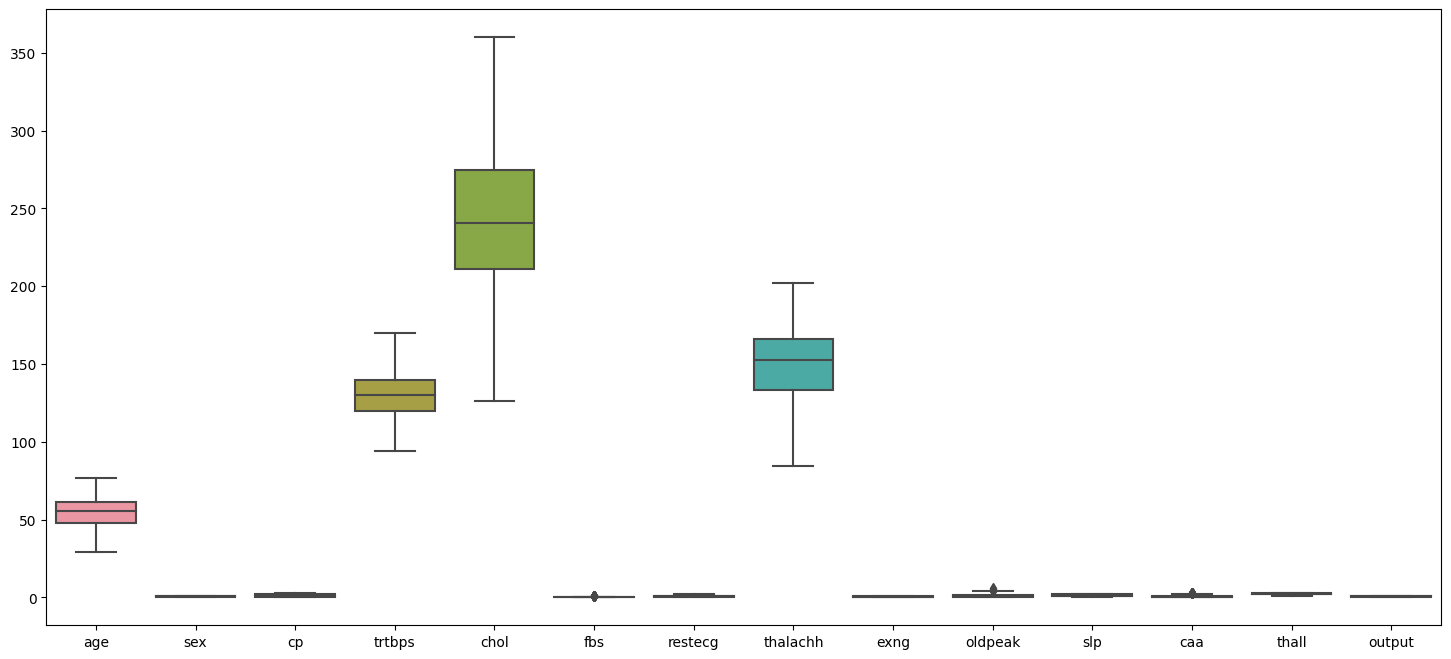

In [79]:
plt.figure(figsize=(18,8))
sns.boxplot(data = ds)
plt.show()

##### numericas = 
    ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
##### categoricas = 
    ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [80]:
ds1 = pd.get_dummies(ds, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
ds1

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,thall_1,thall_2,thall_3
0,63,145,233,150.0,2.3,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187.0,3.5,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172.0,1.4,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,56,120,236,178.0,0.8,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,57,120,354,163.0,0.6,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123.0,0.2,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
299,45,110,264,132.0,1.2,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
300,68,144,193,141.0,3.4,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
301,57,130,131,115.0,1.2,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


### Função para dividir (X,y) para teste e treino; Treinar; e printar relatório da learning.
    - train_test_split
    - training
    - predict classification
    - Confusion Matrix

In [81]:
def infor_learn(dataset, algoritmo, opt = 2):
    X = dataset.drop('output', axis=1)
    y = dataset.output

    # train_test_split

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()

    # training
    ml.fit(X_train, y_train)
    print('Acurácia:')
    score_train = ml.score(X_train, y_train)
    print('     Treino = {:.4}'.format(score_train*100)+'%')

    score_test = ml.score(X_test, y_test)
    print('     Teste = {:.4}'.format(score_test*100)+'%')

    # predict

    y_predict = ml.predict(X_test)
    print('\nClassification:\n',classification_report(y_test, y_predict))

    # Confusion Matrix
    print('Confusion Matrix:')
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True, cmap='Blues')
    
    return score_train, score_test 

### KNN: Aplicação do algoritmo KNN(K Nearest Neighbor)
    - Através do scikit-learn KNeighborsClassifier

Acurácia:
     Treino = 75.74%
     Teste = 67.0%

Classification:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61        43
           1       0.71      0.72      0.71        57

    accuracy                           0.67       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.67      0.67      0.67       100

Confusion Matrix:


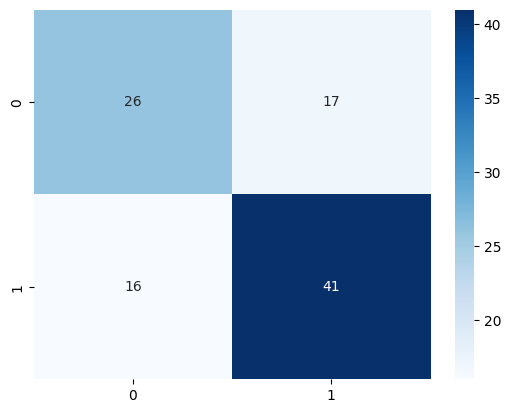

In [82]:
kn_train, kn_test = infor_learn(ds1, KNeighborsClassifier)

### Aplicação de outros algoritmos para comparamos o desempenho do Algoritmo KNN

    LogisticRegression:

Acurácia:
     Treino = 87.13%
     Teste = 88.0%

Classification:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.91      0.88      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

Confusion Matrix:


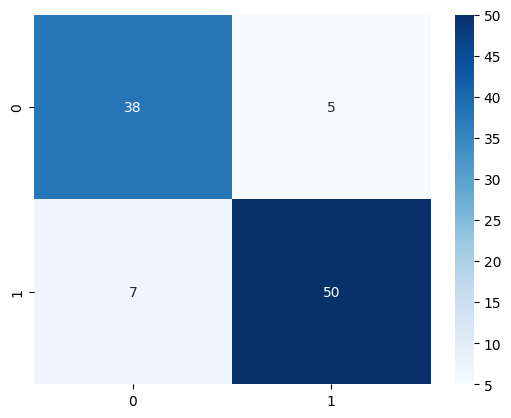

In [83]:
log_train, log_test = infor_learn(ds1, LogisticRegression,0)

    DecisionTreeClassifier:

Acurácia:
     Treino = 100.0%
     Teste = 76.0%

Classification:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74        43
           1       0.82      0.74      0.78        57

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100

Confusion Matrix:


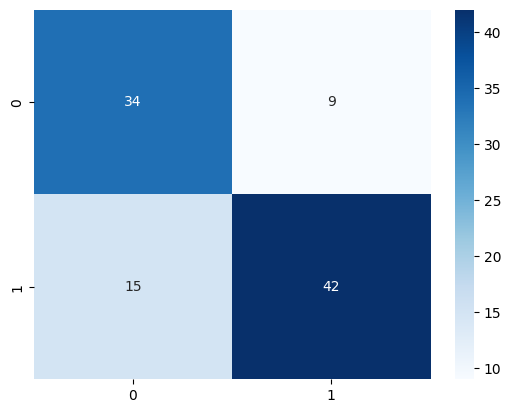

In [84]:
tree_train, tree_test = infor_learn(ds1, DecisionTreeClassifier)

    AdaBoostClassifier:

Acurácia:
     Treino = 95.54%
     Teste = 83.0%

Classification:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        43
           1       0.87      0.82      0.85        57

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:


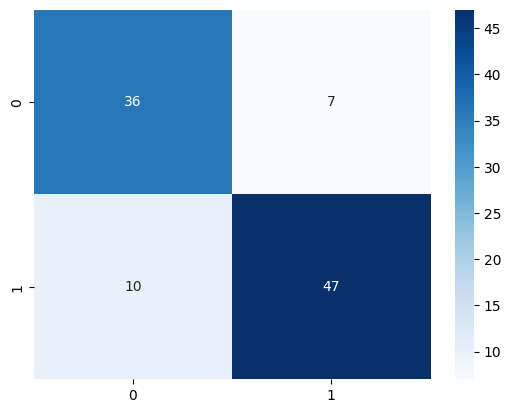

In [85]:
ada_train, ada_test = infor_learn(ds1, AdaBoostClassifier)

    RandomForestClassifier:

Acurácia:
     Treino = 100.0%
     Teste = 82.0%

Classification:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.83      0.86      0.84        57

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.82      0.82      0.82       100

Confusion Matrix:


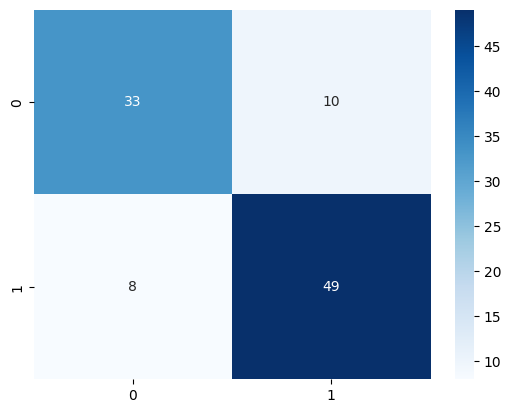

In [86]:
rand_train, rand_test = infor_learn(ds1, RandomForestClassifier)

#### Criando um rank das Acurácias Testes

In [87]:
dados = {'Models' : ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','AdaBoostClassifier'],
'Accuracy Train' : [round(log_train*100,2),round(tree_train*100,2),round(kn_train*100,2),round(rand_train*100,2),round(ada_train*100,2)],
'Accuracy Test' : [round(log_test*100,2),round(tree_test*100,2),round(kn_test*100,2),round(rand_test*100,2),round(ada_test*100,2)],}

graf = pd.DataFrame(dados)
graf.sort_values(by='Accuracy Test', ascending=False, inplace = True)
graf

,Models,Accuracy Train,Accuracy Test
0,LogisticRegression,87.13,88.0
4,AdaBoostClassifier,95.54,83.0
3,RandomForestClassifier,100.00,82.0
1,DecisionTreeClassifier,100.00,76.0
2,KNeighborsClassifier,75.74,67.0


#### Tratando as features numéricas para melhorar o desempenho do KNN através do StandarScaler
### StandarScaler
    - Transforma os dados e os coloca na mesma escala.
    - Para cada feature, a média seria 0, e o Desvio Padrão seria 1.
    - As features são padronizadas, tornando-as mais manejáveis para nossos modelos.
    - Os modelos Não Baseados em Árvores de Decisão se beneficiam mais deste tipo de padronização.
    - KNN é baseado em exemplos e não em árvores de decisão.

In [88]:
def infor_learn_SScaler(dataset, algoritmo, opt = 2):
    X = dataset.drop('output', axis=1)
    y = dataset.output

    # train_test_split

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

    # Padronização das features numéricas com StandardScaler
    scaler = StandardScaler()

    columns_scaler = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

    X_train[columns_scaler] = scaler.fit_transform(X_train[columns_scaler])
    X_test[columns_scaler] = scaler.transform(X_test[columns_scaler])
    

    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()

    # training
    ml.fit(X_train, y_train)
    print('Acurácia:')
    score_train = ml.score(X_train, y_train)
    print('     Treino = {:.4}'.format(score_train*100)+'%')

    score_test = ml.score(X_test, y_test)
    print('     Teste = {:.4}'.format(score_test*100)+'%')

    # predict

    y_predict = ml.predict(X_test)
    print('\nClassification:\n',classification_report(y_test, y_predict))
    print('Confusion Matrix:')
    confusion = confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True, cmap='Blues')
    
    return score_train, score_test

### KNN: Aplicação do KNN com as features numéricas padronizadas através do StandardScaler from scikit-learn

     Podemos ver que obtivemos uma acurácia maior aplicando o KNN com as features numéricas padronizadas.

Acurácia:
     Treino = 89.6%
     Teste = 84.0%

Classification:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.87      0.84      0.86        57

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

Confusion Matrix:


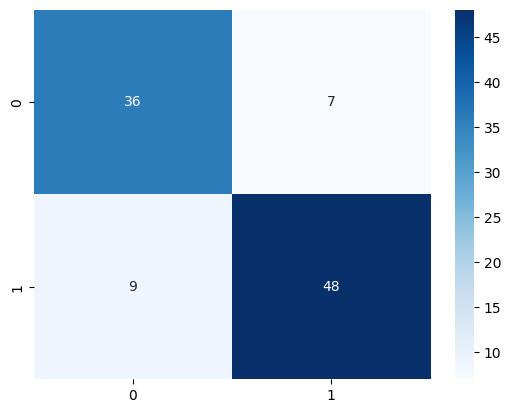

In [89]:
kn_train_scaler, kn_test_scaler = infor_learn_SScaler(ds1, KNeighborsClassifier)

### Aplicaremos outros algoritmos com as features numéricas padronizadas para termos noção desempenho do KNN com StandardScaler

    LogisticRegression: 

Acurácia:
     Treino = 86.63%
     Teste = 87.0%

Classification:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.89      0.88      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

Confusion Matrix:


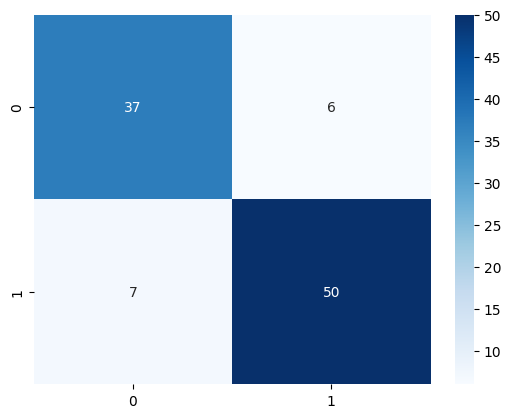

In [90]:
log_train_scaler, log_test_scaler = infor_learn_SScaler(ds1, LogisticRegression,0)

    DecisionTreeClassifier:

Acurácia:
     Treino = 100.0%
     Teste = 80.0%

Classification:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        43
           1       0.88      0.75      0.81        57

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.81      0.80      0.80       100

Confusion Matrix:


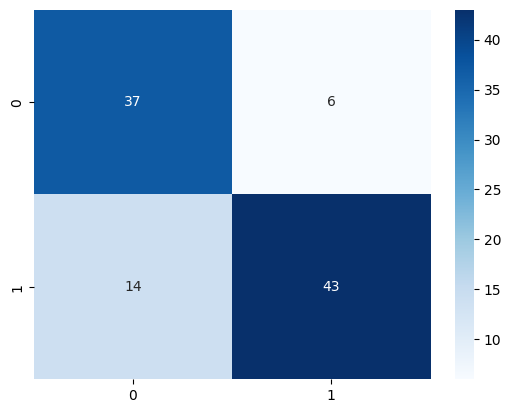

In [91]:
tree_train_scaler, tree_test_scaler = infor_learn_SScaler(ds1, DecisionTreeClassifier)

    AdaBoostClassifier:

Acurácia:
     Treino = 95.54%
     Teste = 83.0%

Classification:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        43
           1       0.87      0.82      0.85        57

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:


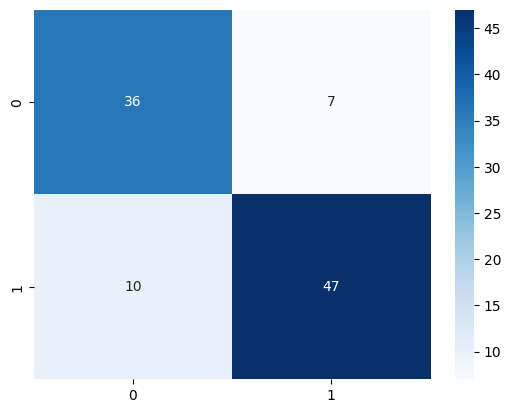

In [92]:
ada_train_scaler, ada_test_scaler = infor_learn_SScaler(ds1, AdaBoostClassifier)

    RandomForestClassifier:

Acurácia:
     Treino = 100.0%
     Teste = 85.0%

Classification:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.88      0.86      0.87        57

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:


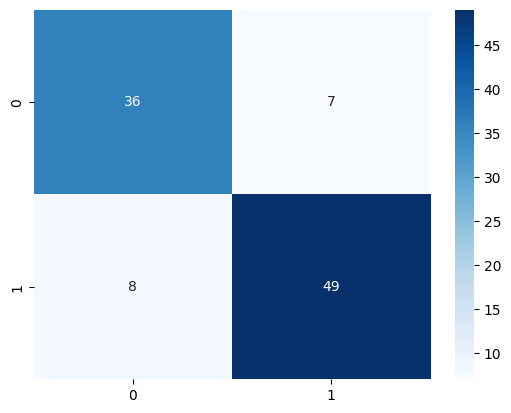

In [93]:
rand_train_scaler, rand_test_scaler = infor_learn_SScaler(ds1, RandomForestClassifier)

#### Criando um rank das Acurácias Testes *StandardScaler

In [94]:
dados_scaler = {'Models' : ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','AdaBoostClassifier'],
'Accuracy Train' : [round(log_train_scaler*100,2),round(tree_train_scaler*100,2),round(kn_train_scaler*100,2),round(rand_train_scaler*100,2),round(ada_train_scaler*100,2)],
'Accuracy Test' : [round(log_test_scaler*100,2),round(tree_test_scaler*100,2),round(kn_test_scaler*100,2),round(rand_test_scaler*100,2),round(ada_test_scaler*100,2)],}

graf_scaler = pd.DataFrame(dados_scaler)
graf_scaler.sort_values(by='Accuracy Test', ascending=False, inplace = True)

# Análise dos resultados:

    SEM StandardScaler:

In [95]:
graf

,Models,Accuracy Train,Accuracy Test
0,LogisticRegression,87.13,88.0
4,AdaBoostClassifier,95.54,83.0
3,RandomForestClassifier,100.00,82.0
1,DecisionTreeClassifier,100.00,76.0
2,KNeighborsClassifier,75.74,67.0


 O KNN teve a pior acurácia.

    COM StandardScaler:

In [96]:
graf_scaler

,Models,Accuracy Train,Accuracy Test
0,LogisticRegression,86.63,87.0
3,RandomForestClassifier,100.00,85.0
2,KNeighborsClassifier,89.60,84.0
4,AdaBoostClassifier,95.54,83.0
1,DecisionTreeClassifier,100.00,80.0


O KNN por ser sensível a esta padronização teve a sua acurácia MELHORADA, pórém por se tratar de saúde esperamos chegar acima dos 90%.